<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/05_Linear_Classifiers_in_Python/01_Applying_logistic_regression_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this course you'll learn all about using linear classifiers, specifically logistic regression and support vector machines, with scikit-learn. Once you've learned how to apply these methods, you'll dive into the ideas behind them and find out what really makes them tick. At the end of this course you'll know how to train, test, and tune these linear classifiers in Python. You'll also have a conceptual foundation for understanding many other machine learning algorithms.

In [63]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/34_Unsupervised_Learning_in_Python/dataset/Grains/seeds-width-vs-length.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
grains = pd.read_csv(url, header=None)
display(grains.head())


,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


### Scikit-learn Basics

**KNN classification**   
In this exercise you'll explore a subset of the Large Movie Review Dataset. The variables X_train, X_test, y_train, and y_test are already loaded into the environment. The X variables contain features based on the words in the movie reviews, and the y variables contain labels for whether the review sentiment is positive (+1) or negative (-1).

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the scikit-learn Cheat Sheet and keep it handy!

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
digits = datasets.load_digits()
X, y =  digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)


# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

# dataset link https://ai.stanford.edu/~amaas/data/sentiment/

Prediction for test example 0: 5


Overfitting
Which of the following situations looks like an example of overfitting?

Answer the question



- Training accuracy 50%, testing accuracy 50%.
Press
1

- Training accuracy 95%, testing accuracy 95%.
Press
2

- --Training accuracy 95%, testing accuracy 50%.
Press
3

- Training accuracy 50%, testing accuracy 95%.

### SVC

Running LogisticRegression and SVC
In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.

In [65]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr =  LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0
0.9555555555555556
0.9962880475129918
0.9866666666666667


**Sentiment analysis for movie reviews**   
In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset.

The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).



In [ ]:
# download the data from given link above and put it into model/

# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

# Fantastic! The second probability would have been even lower, but the word "good" trips it up a bit, since that's considered a "positive" word.

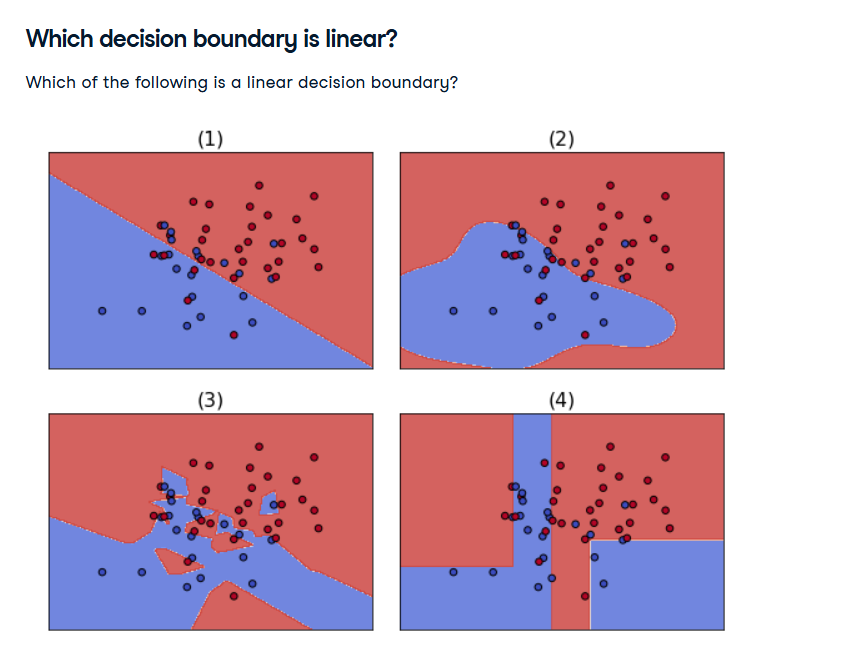

**Visualizing decision boundaries**  
In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is already loaded into X, along with binary labels in y.



In [67]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
        """
        if proba:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
        return out


def make_meshgrid(x, y, h=.02, lims=None):
        """Create a mesh of points to plot in

        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """

        if lims is None:
            x_min, x_max = x.min() - 1, x.max() + 1
            y_min, y_max = y.min() - 1, y.max() + 1
        else:
            x_min, x_max, y_min, y_max = lims
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1, lims=lims)

        if ax is None:
            plt.figure()
            ax = plt.gca()
            show = True
        else:
            show = False

        # can abstract some of this into a higher-level function for learners to call
        cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
        if proba:
            cbar = plt.colorbar(cs)
            cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
            cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
        labels = np.unique(y)
        if len(labels) == 2:
            ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
            ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
        else:
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
        if ticks:
            ax.set_xticks(())
            ax.set_yticks(())
    #     ax.set_title(title)
        if show:
            plt.show()
        else:
            return ax


def plot_4_classifiers(X, y, clfs):

        # Set-up 2x2 grid for plotting.
        fig, sub = plt.subplots(2, 2)
        plt.subplots_adjust(wspace=0.2, hspace=0.2)

        for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
            # clf.fit(X, y)
            plot_classifier(X, y, clf, ax, ticks=True)
            ax.set_title(title)
        plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


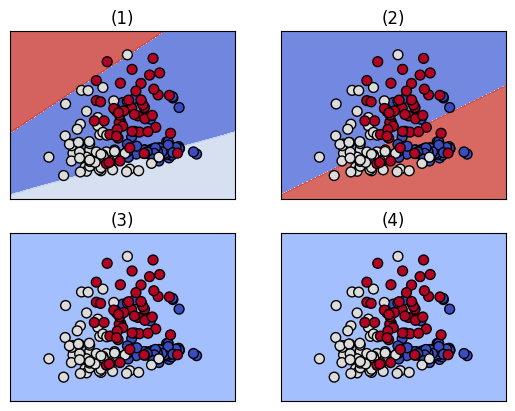

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


def plot_contours(ax, clf, xx, yy, X_train_mean, proba=False, **params):
        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        X_train_mean: mean of the training data features
        params: dictionary of params to pass to contourf, optional
        """
        # Create a full-dimensional input array for prediction
        # Use the first two features from the meshgrid and the mean of the rest
        X_input = np.c_[xx.ravel(), yy.ravel(), np.tile(X_train_mean[2:], len(xx.ravel())).reshape(-1, len(X_train_mean)-2)]

        if proba:
            Z = clf.predict_proba(X_input)[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.predict(X_input)
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
        return out


def make_meshgrid(x, y, h=.02, lims=None):
        """Create a mesh of points to plot in

        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """

        if lims is None:
            x_min, x_max = x.min() - 1, x.max() + 1
            y_min, y_max = y.min() - 1, y.max() + 1
        else:
            x_min, x_max, y_min, y_max = lims
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1, lims=lims)

        if ax is None:
            plt.figure()
            ax = plt.gca()
            show = True
        else:
            show = False

        # can abstract some of this into a higher-level function for learners to call
        # Pass the mean of the training data features to plot_contours
        cs = plot_contours(ax, clf, xx, yy, np.mean(X, axis=0), cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
        if proba:
            cbar = plt.colorbar(cs)
            cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
            cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
        labels = np.unique(y)
        if len(labels) == 2:
            ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
            ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
        else:
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
        if ticks:
            ax.set_xticks(())
            ax.set_yticks(())
    #     ax.set_title(title)
        if show:
            plt.show()
        else:
            return ax


def plot_4_classifiers(X, y, clfs):

        # Set-up 2x2 grid for plotting.
        fig, sub = plt.subplots(2, 2)
        plt.subplots_adjust(wspace=0.2, hspace=0.2)

        for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
            # clf.fit(X, y)
            plot_classifier(X, y, clf, ax, ticks=True)
            ax.set_title(title)
        plt.show()


# Load the digits dataset and use only the first two features for plotting
digits = datasets.load_wine()
X = digits.data # Use all features
y = digits.target

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)


# Define the classifiers
classifier_classes = [LogisticRegression, LinearSVC, SVC, KNeighborsClassifier ]

# Fit the classifiers
fitted_classifiers = []
for Classifier in classifier_classes:
    c = Classifier() # Create an instance of the classifier
    # Fit using the imputed data
    c.fit(X_imputed, y)
    fitted_classifiers.append(c)


# Plot the classifiers
plot_4_classifiers(X_imputed, y, fitted_classifiers)
plt.show()

#  logistic regression and linear SVM are linear classifiers whereas KNN is not.
#  The default SVM is also non-linear, but this is hard to see in the plot because
#  it performs poorly with default hyperparameters. With better hyperparameters, it performs well.